In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [2]:
options = {
  "model": "cfg/tiny-yolo-voc-lp.cfg",
  "load": -1,
  'threshold': 0.3  
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-lp.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13, 13, 256)
 Init  |

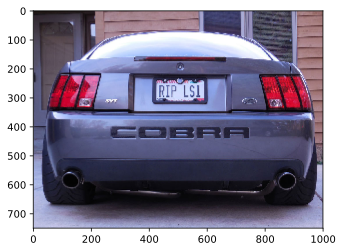

In [41]:

img_name = '3.png'

img = cv2.imread("LicPlateImages/"+img_name, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show

results = tfnet.return_predict(img)

  



True

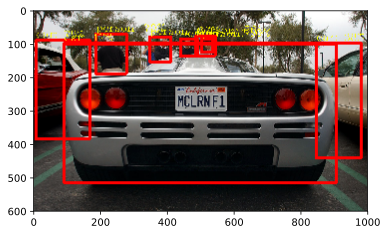

In [12]:
for result in results:
    tl = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    confidence = str(int(result['confidence']*100))+'%'
    img = cv2.rectangle(img, tl, br, (255,0,0), 7)
    cv2.putText(img, result['label']+': '+confidence, (tl[0],tl[1]-8),cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,0), 1)

plt.imshow(img)
plt.show

cv2.imwrite('./results/'+img_name, cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

label: license_plate
confidence: 95%
coordinates: (363, 212) to (638, 344)


True

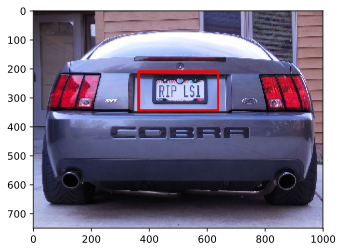

In [42]:
max_conf = 0
i = -1 
for result in results:
    if result['confidence'] > max_conf:
        i += 1
        max_conf = result['confidence']
                

tl = (results[i]['topleft']['x'], results[i]['topleft']['y'])
br = (results[i]['bottomright']['x'], results[i]['bottomright']['y'])
confidence = str(int(results[i]['confidence']*100))+'%'

print('label: '+results[i]['label'])
print('confidence: '+confidence)
print('coordinates: '+str(tl)+' to '+str(br))


imgc = img[results[i]['topleft']['y']:results[i]['bottomright']['y'], results[i]['topleft']['x']:results[i]['bottomright']['x']]
cv2.imwrite('./plates/'+img_name, cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB))
img = cv2.rectangle(img, tl, br, (255,0,0), 7)
#cv2.putText(img, 'LP: '+confidence, (tl[0],tl[1]-8),cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,0), 2)


plt.imshow(img)
plt.show

cv2.imwrite('./results/'+img_name, cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

True